<a href="https://colab.research.google.com/github/lalitha-sahitya/Disaster-Tweets/blob/main/disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [87]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
od.download('https://www.kaggle.com/competitions/nlp-getting-started/data')

Skipping, found downloaded files in "./nlp-getting-started" (use force=True to force download)


In [89]:
os.listdir('nlp-getting-started')

['test.csv', 'sample_submission.csv', 'train.csv']

In [90]:
train_data=pd.read_csv('/content/nlp-getting-started/train.csv')
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


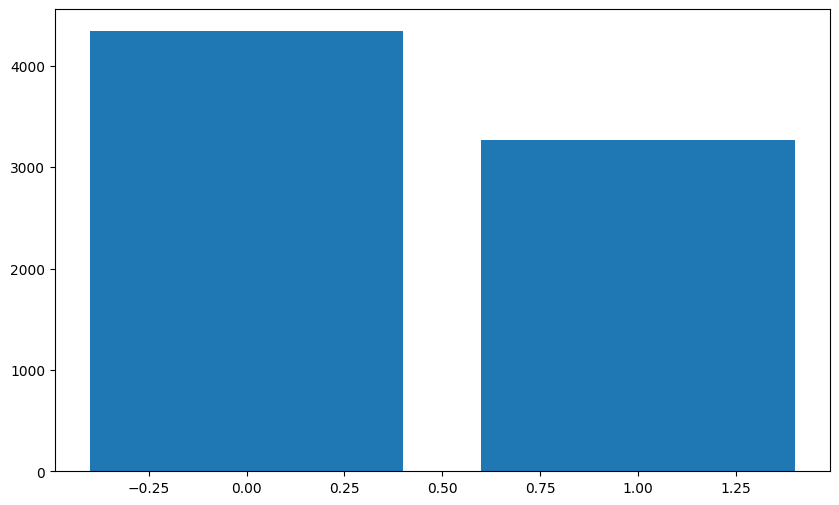

In [145]:
plt.figure(figsize=(10,6))
plt.bar(train_data['target'].value_counts().index,train_data['target'].value_counts().values)
plt.show()

In [91]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [92]:
train_data[train_data['target']==1]['text'].values[1]

'Forest fire near La Ronge Sask. Canada'

In [93]:
train_data[train_data['target']==1]['text'].values[0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [94]:
train_data=train_data.drop(['id','keyword','location'],axis=1)

In [95]:
train_data.isna().sum()

,0
text,0
target,0


In [96]:
test_data=pd.read_csv('/content/nlp-getting-started/test.csv')
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [97]:
test_data=test_data.drop(['id','keyword','location'],axis=1)

In [98]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3263 non-null   object
dtypes: object(1)
memory usage: 25.6+ KB


In [99]:
test_data.isna().sum()

,0
text,0


In [100]:
x=train_data['text']
y=train_data['target']

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
x_train.head()

,text
4996,Courageous and honest analysis of need to use ...
3263,@ZachZaidman @670TheScore wld b a shame if tha...
4907,Tell @BarackObama to rescind medals of 'honor'...
2855,Worried about how the CA drought might affect ...
4716,@YoungHeroesID Lava Blast &amp; Power Red #Pan...


In [117]:
test_data=test_data['text']

In [118]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
t=TfidfVectorizer()

In [119]:
x_train_vec=cv.fit_transform(x_train)
x_test_vec=cv.transform(x_test)
test_data_vec=cv.transform(test_data)

In [120]:
x_train_t=t.fit_transform(x_train)
x_test_t=t.transform(x_test)
test_data_t=t.transform(test_data)

In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [122]:
lr=LogisticRegression(class_weight='balanced')
lr.fit(x_train_vec,y_train)
y_pred=lr.predict(x_test_vec)
print(y_pred)
print(accuracy_score(y_test,y_pred))

[0 0 1 ... 1 1 1]
0.8036769533814839


In [123]:
lr.fit(x_train_t,y_train)
y_pred=lr.predict(x_test_t)
print(accuracy_score(y_test,y_pred))

0.788575180564675


In [124]:
nb=MultinomialNB()
nb.fit(x_train_vec,y_train)
y_pred=nb.predict(x_test_vec)
print(accuracy_score(y_test,y_pred))

0.8010505581089954


In [125]:
nb.fit(x_train_t,y_train)
y_pred=nb.predict(x_test_t)
print(accuracy_score(y_test,y_pred))

0.7997373604727511


In [126]:
print(test_data_vec.shape)

(3263, 18566)


In [137]:
preds=nb.predict(test_data_vec)

In [138]:
preds

array([1, 0, 1, ..., 1, 1, 1])

In [139]:
preds[:10]

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [140]:
sub=pd.read_csv('/content/nlp-getting-started/sample_submission.csv')
sub.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [142]:
sub['target']=preds

In [143]:
sub['target'].value_counts()

,count
target,
0,2175
1,1088


In [144]:
sub.to_csv('sub.csv',index=False)

In [146]:
import joblib
joblib.dump(nb, 'model.pkl')
joblib.dump(cv, 'vectorizer.pkl')

['vectorizer.pkl']